<a href="https://colab.research.google.com/github/jobayed80/Machine_Learning_Learning_Course/blob/main/DS_424_Lab_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

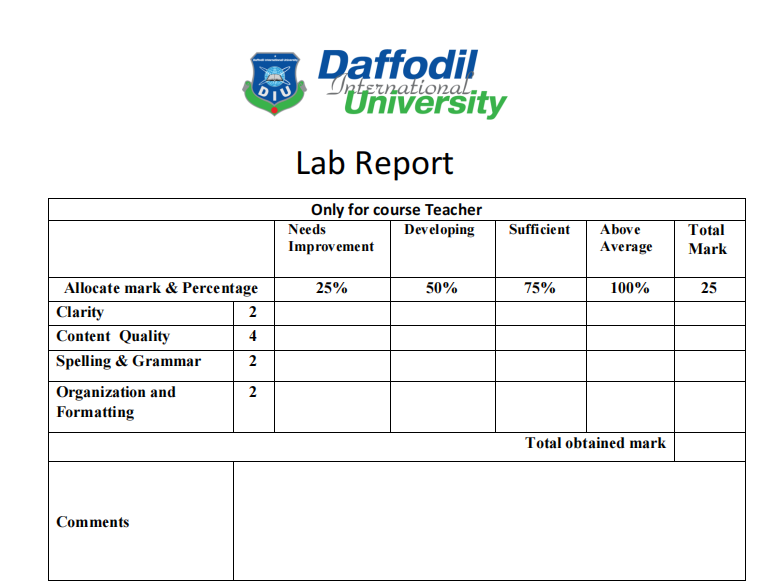


# **Semester: Fall 2023**

# **Student Name: Md. Jobayed Hossain Rabbi**

# **Student ID: 193-35-2948**

# **Batch: 30th Section:A2 Course Code: DS-424**

# **Course Name: : Machine Learning Driven Data Analysis II and**
# **Communicating Data Insights Lab (DS Major)**

# **Course Teacher Name: MD. Shohel Arman**

# **Designation: Assistant Professor**

# **Submission Date: 08-12-2023**




---





---





---



# **EXPERIMENT NO: 1**
# **CLASSIFYING DIGITS**

**I.Download the Iris Flower dataset from https://www.kaggle.com/datasets/arshid/iris-flower-dataset.**

---



In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

**II.Load data into Pandas DataFrame.**

---



In [ ]:
df = pd.read_csv("IRIS.csv")

**III.Explore the dataset, report the number of data and features.**

---



In [ ]:
df.head()

In [ ]:
# Display the number of rows (data) and columns (features)
num_rows, num_cols = df.shape
print(f"The dataset has {num_rows} rows and {num_cols} columns.")

In [ ]:
df.isnull().sum()

In [ ]:
df.describe()

**IV.Visualize some sample images of the dataset using Matplotlib.**

---



V. Preprocess the dataset as necessary, for example, splitting, scaling, normalizing, etc.
**bold text**

---



In [ ]:

# Separate features (X) and target variable (y)
# select sepal_length feature
x = df.iloc[:, 0:1].values
print(x)
print(x.shape)

print("\n")

# select species feature
y = df.iloc[:, -1]
print(y)
print(y.shape)

In [ ]:

# LabelEncoder from scikit to encode target variable y
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y = le.fit_transform(y)

In [ ]:
# Split the data into training and testing sets
# from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [ ]:
# Perform scaling or normalization if needed
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#This means it calculates the mean and standard deviation from the training set
x_train_scaled = scaler.fit_transform(x_train)

#use the mean and stanadard deviation from the training set (x_train) tp transform the testing set
x_test_scaled = scaler.transform(x_test)

print(x_train_scaled)
print()
print(x_test_scaled)

**VI. Train Logistic Regression, Support Vector Machine, and Decision Tree algorithm on the dataset.**

---



In [ ]:
# Train Logistic Regression
# from sklearn.linear_model import LogisticRegression
logistic_reg_model = LogisticRegression(max_iter=1000)
logistic_reg_model.fit(x_train, y_train)

In [ ]:

# Train Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(x_train, y_train)

In [ ]:
# Train Decision Tree
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)

In [ ]:

# Make predictions on the test set
y_pred_logistic_regression = logistic_reg_model.predict(x_test)
y_pred_svm = svm_model.predict(x_test)
y_pred_decision_tree = decision_tree_model.predict(x_test)
print(y_pred_logistic_regression)
print(y_pred_svm)
print(y_pred_decision_tree)

In [ ]:

# Evaluate the models
accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)

In [ ]:

print("Logistic Regression Accuracy:", accuracy_logistic_regression)
print("SVM Accuracy:", accuracy_svm)
print("Decision Tree Accuracy:", accuracy_decision_tree)

In [ ]:

# Additional: Print classification reports for detailed evaluation
print("\nClassification Report for Logistic Regression:\n", classification_report(y_test, y_pred_logistic_regression))
print("\n")
print("\nClassification Report for SVM:\n", classification_report(y_test, y_pred_svm))
print("\n")
print("\nClassification Report for Decision Tree:\n", classification_report(y_test, y_pred_decision_tree))

**VII. Use hyperparameter tuning techniques to select the best hyperparameters of the respective models, and finally select the best model of each kind.**

---



Data Visualization

In [ ]:

# Finding out the correlation between the features
corr = df.corr()
corr.shape

In [ ]:

# Plotting the heatmap of correlation between features
plt.figure(figsize=(7,7))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')
plt.show()


Scatter Plot Visualization

In [ ]:
plt.figure(figsize=(6, 6))

# can choose different colors and markers for scatter plot
plt.scatter(x, y, c=np.arange(len(x)), cmap='viridis', s=50, alpha=0.5)

# Add labels and title
plt.xlabel('X-axis Label of sepal_length')
plt.ylabel('Y-axis Label species')
plt.title('Scatter Plot of IRIS')

# Add colorbar
cbar = plt.colorbar()
cbar.set_label('Data Index')

# Show the plot
plt.show()

Scatter Plot Visualization

In [ ]:
# Resize the figure
plt.figure(figsize=(8, 6))


# Create a violin plot
sns.violinplot(data=[x,y],palette=['skyblue', 'lightcoral'], names=['X', 'Y'])

# Add labels and title
plt.xlabel('X-axis Label of sepal_length')
plt.ylabel('Y-axis Label species')
plt.title('Scatter Plot visuliazation of IRIS')
# Show the plot
plt.show()

Support Vector Machine (SVM):

In [ ]:
svm_classifier = SVC()
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_search_svm = GridSearchCV(svm_classifier, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(x_train, y_train)
best_svm_model = grid_search_svm.best_estimator_
print(best_svm_model)

K-Nearest Neighbors (KNN):

In [ ]:
knn_classifier = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

grid_search_knn = GridSearchCV(knn_classifier, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(x_train, y_train)

best_knn_model = grid_search_knn.best_estimator_
best_knn_model

In [ ]:

# Evaluate the models on the test set
y_pred_svm = best_svm_model.predict(x_test)
y_pred_knn = best_knn_model.predict(x_test)


accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("SVM Accuracy:", accuracy_svm)
print("KNN Accuracy:", accuracy_knn)

**VIII. Evaluate training performance on the train data by generating confusion matrices and computing accuracy, precision, recall, f1 score, and so on**

---



In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Predictions on the training set
y_train_pred_logistic_regression = logistic_reg_model.predict(x_train)
y_train_pred_svm = svm_model.predict(x_train)
y_train_pred_decision_tree = decision_tree_model.predict(x_train)

# Confusion matrix and evaluation metrics for Logistic Regression
conf_matrix_logistic_regression = confusion_matrix(y_train, y_train_pred_logistic_regression)
accuracy_train_logistic_regression = accuracy_score(y_train, y_train_pred_logistic_regression)
precision_train_logistic_regression = precision_score(y_train, y_train_pred_logistic_regression, average='weighted')
recall_train_logistic_regression = recall_score(y_train, y_train_pred_logistic_regression, average='weighted')
f1_train_logistic_regression = f1_score(y_train, y_train_pred_logistic_regression, average='weighted')

print("Confusion Matrix (Logistic Regression):\n", conf_matrix_logistic_regression)
print("\nAccuracy (Logistic Regression):", accuracy_train_logistic_regression)
print("Precision (Logistic Regression):", precision_train_logistic_regression)
print("Recall (Logistic Regression):", recall_train_logistic_regression)
print("F1 Score (Logistic Regression):", f1_train_logistic_regression)

In [ ]:
# Confusion matrix and evaluation metrics for SVM
conf_matrix_svm = confusion_matrix(y_train, y_train_pred_svm)
accuracy_train_svm = accuracy_score(y_train, y_train_pred_svm)
precision_train_svm = precision_score(y_train, y_train_pred_svm, average='weighted')
recall_train_svm = recall_score(y_train, y_train_pred_svm, average='weighted')
f1_train_svm = f1_score(y_train, y_train_pred_svm, average='weighted')

print("\nConfusion Matrix (SVM):\n", conf_matrix_svm)
print("\nAccuracy (SVM):", accuracy_train_svm)
print("Precision (SVM):", precision_train_svm)
print("Recall (SVM):", recall_train_svm)
print("F1 Score (SVM):", f1_train_svm)


In [ ]:
# Confusion matrix and evaluation metrics for Decision Tree
conf_matrix_decision_tree = confusion_matrix(y_train, y_train_pred_decision_tree)
accuracy_train_decision_tree = accuracy_score(y_train, y_train_pred_decision_tree)
precision_train_decision_tree = precision_score(y_train, y_train_pred_decision_tree, average='weighted')
recall_train_decision_tree = recall_score(y_train, y_train_pred_decision_tree, average='weighted')
f1_train_decision_tree = f1_score(y_train, y_train_pred_decision_tree, average='weighted')

print("\nConfusion Matrix (Decision Tree):\n", conf_matrix_decision_tree)
print("\nAccuracy (Decision Tree):", accuracy_train_decision_tree)
print("Precision (Decision Tree):", precision_train_decision_tree)
print("Recall (Decision Tree):", recall_train_decision_tree)
print("F1 Score (Decision Tree):", f1_train_decision_tree)

# **EXPERIMENT NO 2**
# **PREDICTING HOUSE PRICE**

**I.Download the Boston House Price dataset from https://www.kaggle.com/c/house-prices-advanced-regression-techniques.**

---



In [ ]:
df = pd.read_csv("homeprices.csv")

In [ ]:
df

**III.Explore the dataset, report the number of data and features. Report a summary of each feature.**

In [ ]:
# Display the number of rows (data) and columns (features)
num_rows, num_cols = df.shape
print(f"The dataset has {num_rows} rows and {num_cols} columns.")


In [ ]:
df.isna().sum()

In [ ]:
#Replace Missing Values with Mean
df.fillna(df.mean())

In [ ]:
df.describe()

**IV.Visualize the features using appropriate charts like bar chart, grouped bar chart, stacked bar chart, histogram, etc. to summarize each feature and their interactions.**

---



In [ ]:
plt.hist(df['age'], bins=20, edgecolor='red')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

In [ ]:
age = df['age']
price= df['price']
# Figure Size
fig = plt.figure(figsize =(9, 7))
# Horizontal Bar Plot
plt.bar(age, price)
# Show Plot
plt.show()

In [ ]:
# plot grouped bar chart
df.plot(x='area',
        kind='bar',
        stacked=False,
        title='Grouped Bar Graph with dataframe')

In [ ]:

# Separate features (X) and target variable (y)
# select area feature
X = df.iloc[:, 0:1].values
print(x)
print(x.shape)

print("\n")


In [ ]:

# select price feature
Y = df.iloc[:, -1]
print(y)
print(y.shape)

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [ ]:
# Perform scaling or normalization if needed
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#This means it calculates the mean and standard deviation from the training set
X_train_scaled = scaler.fit_transform(X_train)

#use the mean and stanadard deviation from the training set (x_train) tp transform the testing set
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled)


One-Hot Encoding for Categorical Variables:

In [ ]:
hot_encoding = pd.get_dummies(df)
print(hot_encoding)

In [ ]:
# Example of binning 'age' into three bins
binning = pd.cut(df['age'], bins=[0, 5, 10, float('inf')], labels=['0-5', '6-10', '11+'])
print(binning)

VI.Train Linear Regression, Support Vector Machine, and Decision Tree algorithm on the dataset.

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, Y_train)

In [ ]:
# Support Vector Machine
from sklearn.svm import SVR
svm_model = SVR()
svm_model.fit(X_train, Y_train)


In [ ]:

# Decision Tree
from sklearn.tree import DecisionTreeRegressor
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, Y_train)


In [ ]:
# Evaluate the models
def evaluate_model(model, Y_true, Y_pred):
    mse = mean_squared_error(Y_true, Y_pred)
    r2 = r2_score(Y_true, Y_pred)
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

In [ ]:
# Predictions
Y_pred_linear_reg = linear_reg_model.predict(X_test)
Y_pred_svm = svm_model.predict(X_test)
Y_pred_decision_tree = decision_tree_model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print("Linear Regression Performance:")
evaluate_model(linear_reg_model, Y_test, Y_pred_linear_reg)

print("\nSupport Vector Machine Performance:")
evaluate_model(svm_model, Y_test, Y_pred_svm)

print("\nDecision Tree Performance:")
evaluate_model(decision_tree_model, Y_test, Y_pred_decision_tree)

**VII.Use hyperparameter tuning techniques to select the best hyperparameters of the respective models, and finally select the best model of each kind.**

In [ ]:
# Finding out the correlation between the features
corr = df.corr()
corr.shape

In [ ]:

# Plotting the heatmap of correlation between features
plt.figure(figsize=(15,10))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')
plt.show()

In [ ]:

plt.figure(figsize=(8, 6))

# can choose different colors and markers for scatter plot
plt.scatter(X, Y, c=np.arange(len(x)), cmap='viridis', s=50, alpha=0.5)

# Add labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Scatter Plot of HomePrices')

# Add colorbar
cbar = plt.colorbar()
cbar.set_label('Data Index')

# Show the plot
plt.show()

In [ ]:
# Linear Regression
Y_train_pred_linear_reg = linear_reg_model.predict(X_train)

print("Linear Regression Training Performance:")
evaluate_model(linear_reg_model, Y_train, Y_train_pred_linear_reg)

In [ ]:
# Support Vector Machine
Y_train_pred_svm = best_svm_model.predict(X_train)

print("\nSupport Vector Machine Training Performance:")
evaluate_model(best_svm_model, Y_train, Y_train_pred_svm)

**IX.Evaluate their results on the test data by computing errors like Mean Absolute Error, Mean Square Error, Root Mean Square Error, etc.**

In [ ]:
# Evaluate the models on the test data
print("Linear Regression Test Performance:")
evaluate_model(linear_reg_model, Y_test, Y_pred_linear_reg)


# **EXPERIMENT NO 3**::
# **ENSEMBLE METHODS**

# **I.Train a Voting Classifier and combine all the models you developed in Experiment 1. Compare the results of individual models and the combined model.**

In [ ]:
# Train individual models
model1 = DecisionTreeClassifier(random_state=42)
model2 = RandomForestClassifier(random_state=42)
model3 = SVC(probability=True, random_state=42)


In [ ]:
# Fit each model on the training data
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)
model3.fit(x_train, y_train)


In [ ]:
# Make predictions on the test set for each model
pred1 = model1.predict(x_test)
pred2 = model2.predict(x_test)
pred3 = model3.predict(x_test)


In [ ]:
# Evaluate the individual models
acc1 = accuracy_score(y_test, pred1)
acc2 = accuracy_score(y_test, pred2)
acc3 = accuracy_score(y_test, pred3)


In [ ]:
print("Individual Model Accuracies:")
print(f"Model 1 (Decision Tree): {acc1:.4f}")
print(f"Model 2 (Random Forest): {acc2:.4f}")
print(f"Model 3 (SVM): {acc3:.4f}")


In [ ]:
# Create a Voting Classifier using the ensemble method
from sklearn.ensemble import VotingClassifier
voting_classifier = VotingClassifier(
    estimators=[
        ('model1', model1),
        ('model2', model2),
        ('model3', model3)
    ],
    voting='hard'  # Use 'hard' voting for majority class voting
)

In [ ]:
# Fit the Voting Classifier on the training data
voting_classifier.fit(x_train, y_train)

# Make predictions on the test set using the Voting Classifier
voting_pred = voting_classifier.predict(x_test)

# Evaluate the Voting Classifier
acc_voting = accuracy_score(y_test, voting_pred)

print("\nVoting Classifier Accuracy:")
print(f"Voting Classifier: {acc_voting:.4f}")

**II.Train a Bagging Classifier and combine all the models you developed in Experiment 1. Compare the results of individual models and the combined model.**

In [ ]:
# Create a Bagging Classifier using the ensemble method
from sklearn.ensemble import BaggingClassifier

bagging_classifier = BaggingClassifier(
    base_estimator=None,  # Use None to use DecisionTreeClassifier by default
    n_estimators=10,  # Number of base models
    random_state=42
)

In [ ]:
# Fit the Bagging Classifier on the training data
bagging_classifier.fit(x_train, y_train)

# Make predictions on the test set using the Bagging Classifier
bagging_pred = bagging_classifier.predict(x_test)

# Evaluate the Bagging Classifier
acc_bagging = accuracy_score(y_test, bagging_pred)

print("\nBagging Classifier Accuracy:")
print(f"Bagging Classifier: {acc_bagging:.4f}")

**III.Train a Random Forest Classifier and combine all the models you developed in Experiment 1. Compare the results of individual models and the combined model.**

In [ ]:
# Create a Random Forest Classifier using the ensemble method
random_forest_classifier = RandomForestClassifier(
    n_estimators=10,  # Number of trees in the forest
    random_state=42
)

In [ ]:
# Fit the Random Forest Classifier on the training data
random_forest_classifier.fit(x_train, y_train)

# Make predictions on the test set using the Random Forest Classifier
rf_pred = random_forest_classifier.predict(x_test)

# Evaluate the Random Forest Classifier
acc_rf = accuracy_score(y_test, rf_pred)

print("\nRandom Forest Classifier Accuracy:")
print(f"Random Forest Classifier: {acc_rf:.4f}")

**IV.Train a Stacking Classifier and combine all the models you developed in Experiment 1[link text](https://). Compare the results of individual models and the combined model.**

In [ ]:
# Create a Stacking Classifier using the ensemble method
from sklearn.ensemble import StackingClassifier
stacking_classifier = StackingClassifier(
    estimators=[
        ('model1', model1),
        ('model2', model2),
        ('model3', model3)
    ],
    final_estimator=LogisticRegression(),  # Meta-model
    stack_method='auto',  # Auto chooses the best method (can be 'auto', 'predict_proba', or 'decision_function')
)

In [ ]:
# Fit the Stacking Classifier on the training data
stacking_classifier.fit(x_train, y_train)

# Make predictions on the test set using the Stacking Classifier
stacking_pred = stacking_classifier.predict(x_test)

# Evaluate the Stacking Classifier
acc_stacking = accuracy_score(y_test, stacking_pred)

print("\nStacking Classifier Accuracy:")
print(f"Stacking Classifier: {acc_stacking:.4f}")

**V.Train a Boosting Classifier and combine all the models you developed in Experiment 1. Compare the results of individual models and the combined model.**

In [ ]:
# Create a Boosting Classifier using the AdaBoost algorithm
from sklearn.ensemble import AdaBoostClassifier
boosting_classifier = AdaBoostClassifier(
    base_estimator=None,  # Use None to use DecisionTreeClassifier by default
    n_estimators=50,  # Number of weak learners (base models)
    random_state=42
)

In [ ]:
# Create a Boosting Classifier using the AdaBoost algorithm
boosting_classifier = AdaBoostClassifier(
    base_estimator=None,  # Use None to use DecisionTreeClassifier by default
    n_estimators=50,  # Number of weak learners (base models)
    random_state=42
)

In [ ]:
# Fit the Boosting Classifier on the training data
boosting_classifier.fit(x_train, y_train)

# Make predictions on the test set using the Boosting Classifier
boosting_pred = boosting_classifier.predict(x_test)

# Evaluate the Boosting Classifier
acc_boosting = accuracy_score(y_test, boosting_pred)

print("\nBoosting Classifier Accuracy:")
print(f"Boosting Classifier: {acc_boosting:.4f}")

# **EXPERIMENT NO 4**
# CLUSTERING DIGITS

**I.Download the dataset of experiment 1 and cluster the digits using K-Means clustering algorithm.**

In [ ]:
# Load the MNIST digits dataset
from sklearn import datasets
digits = datasets.load_digits()
data = digits.data
target = digits.target

In [ ]:
# Apply K-Means clustering
from sklearn.cluster import KMeans
n_clusters = 10  # assuming 10 digits
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(data)

In [ ]:
# Reduce dimensionality for visualization (optional)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)


In [ ]:
# Visualize the clustered digits
plt.figure(figsize=(10, 8))


In [ ]:
for i in range(n_clusters):
    plt.scatter(data_pca[kmeans.labels_ == i, 0], data_pca[kmeans.labels_ == i, 1], label=f'Cluster {i}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Cluster Centers')
plt.title('K-Means Clustering of Digits (2D PCA)')
plt.legend()
plt.show()